In [2]:
import numpy as np
import pandas as pd

In [ ]:
#Data Preparation

In [20]:
# Load data - Reading Boston Data
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)#Independent columns
y = pd.Series(boston.target) #Dependent column - Median value of House

In [ ]:
"""Data Definition
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: proportion of people of African American descent by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s"""

In [18]:
#Viewing Data - predictors
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y[1:10] #response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
Regressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [ ]:
"""n_estimators: Number of weak learners to train iteratively.
learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value."""

In [37]:
# Train gradientboost REGRESSOR
model = Regressor.fit(X_train,y_train)

In [38]:
#Predict the response for test dataset
y_pred = model.predict(X_test) 

In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6189585028331107

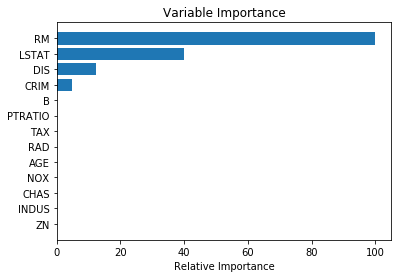

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## `Lets tune the hyperparameters

In [45]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05,0.7,0.9], 'n_estimators':[100,150,200,220,240,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 250}, 0.8761909882474562)